In [1]:
import sys
import os

ruta_src = os.path.join(os.path.dirname(os.getcwd()), 'src')
sys.path.append(os.path.abspath(ruta_src))

In [2]:
import problem as prob
import algorithms.Montecarlo as mc
import algorithms.util as utils

In [3]:
# Instanciamos el problema con el fichero y la probabibilidad de error en las acciones.

problem = prob.Problem("../maps/map1.txt", 0.2)

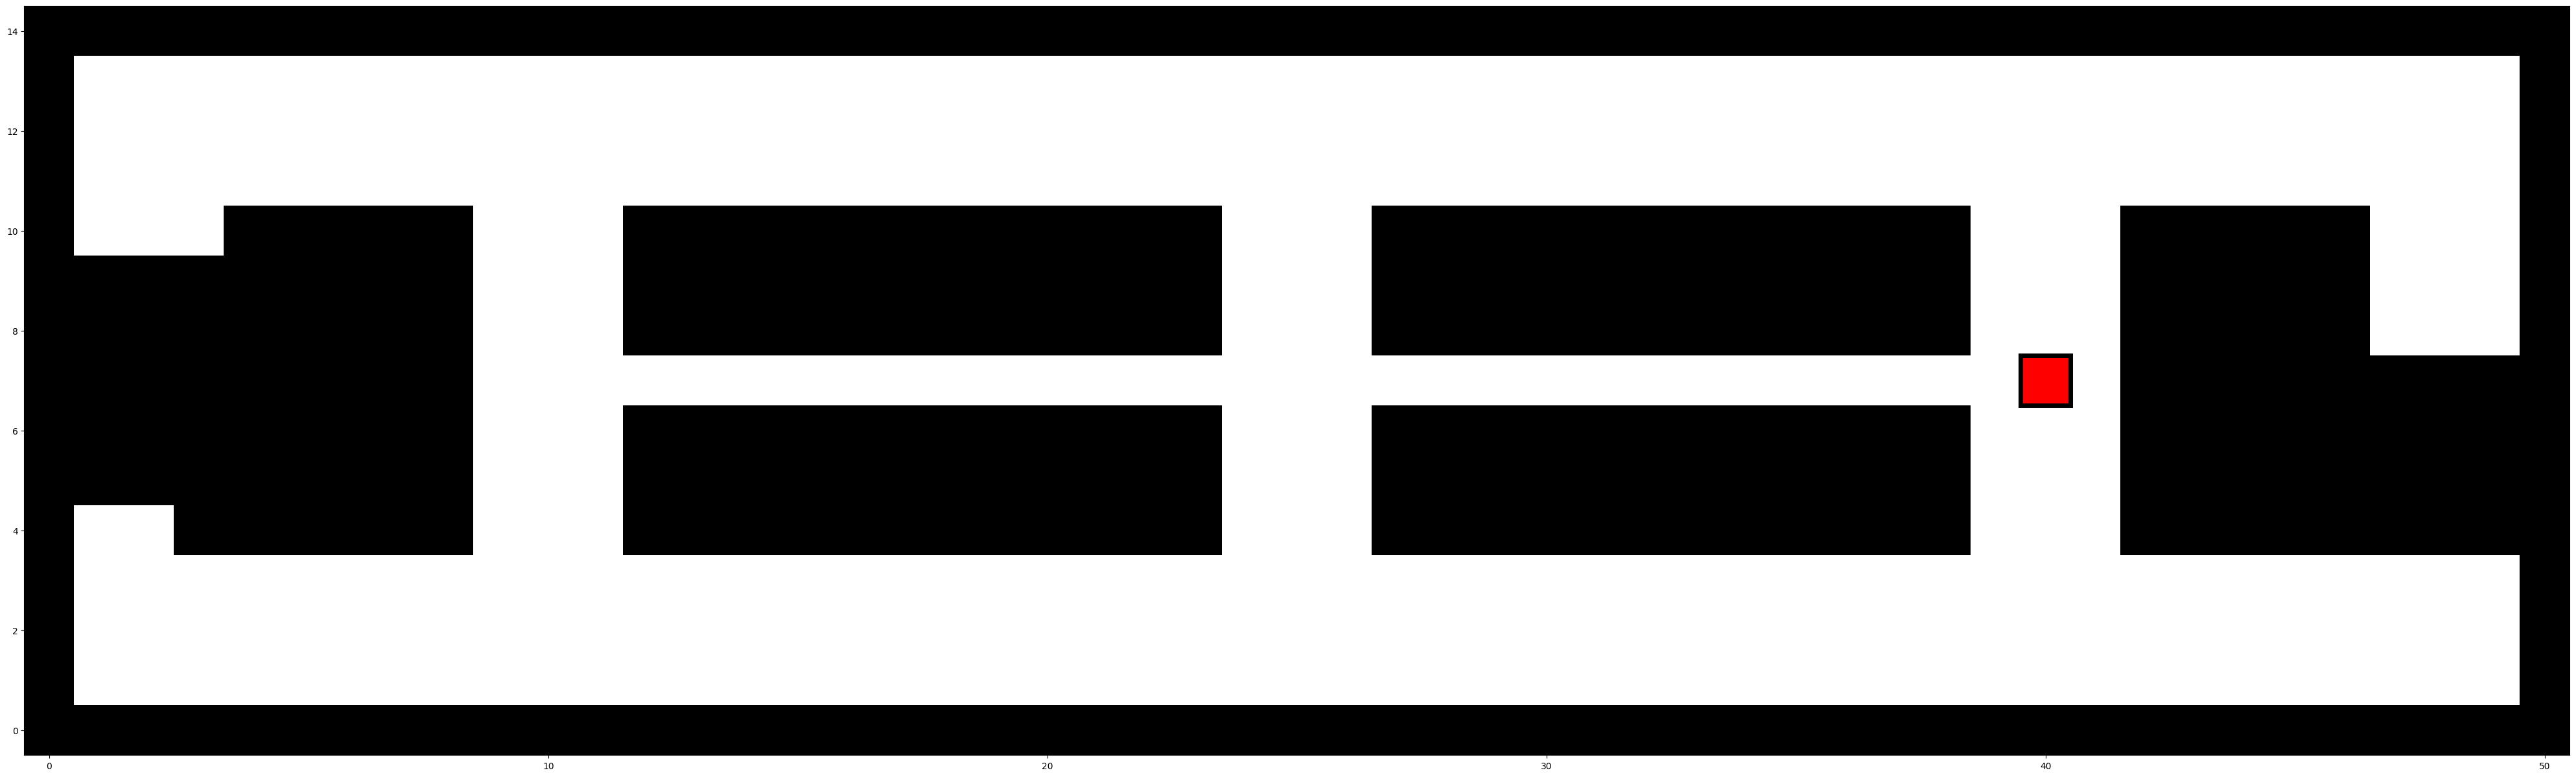

In [4]:
# Visualizamos el mapa

problem.visualiza_mapa()

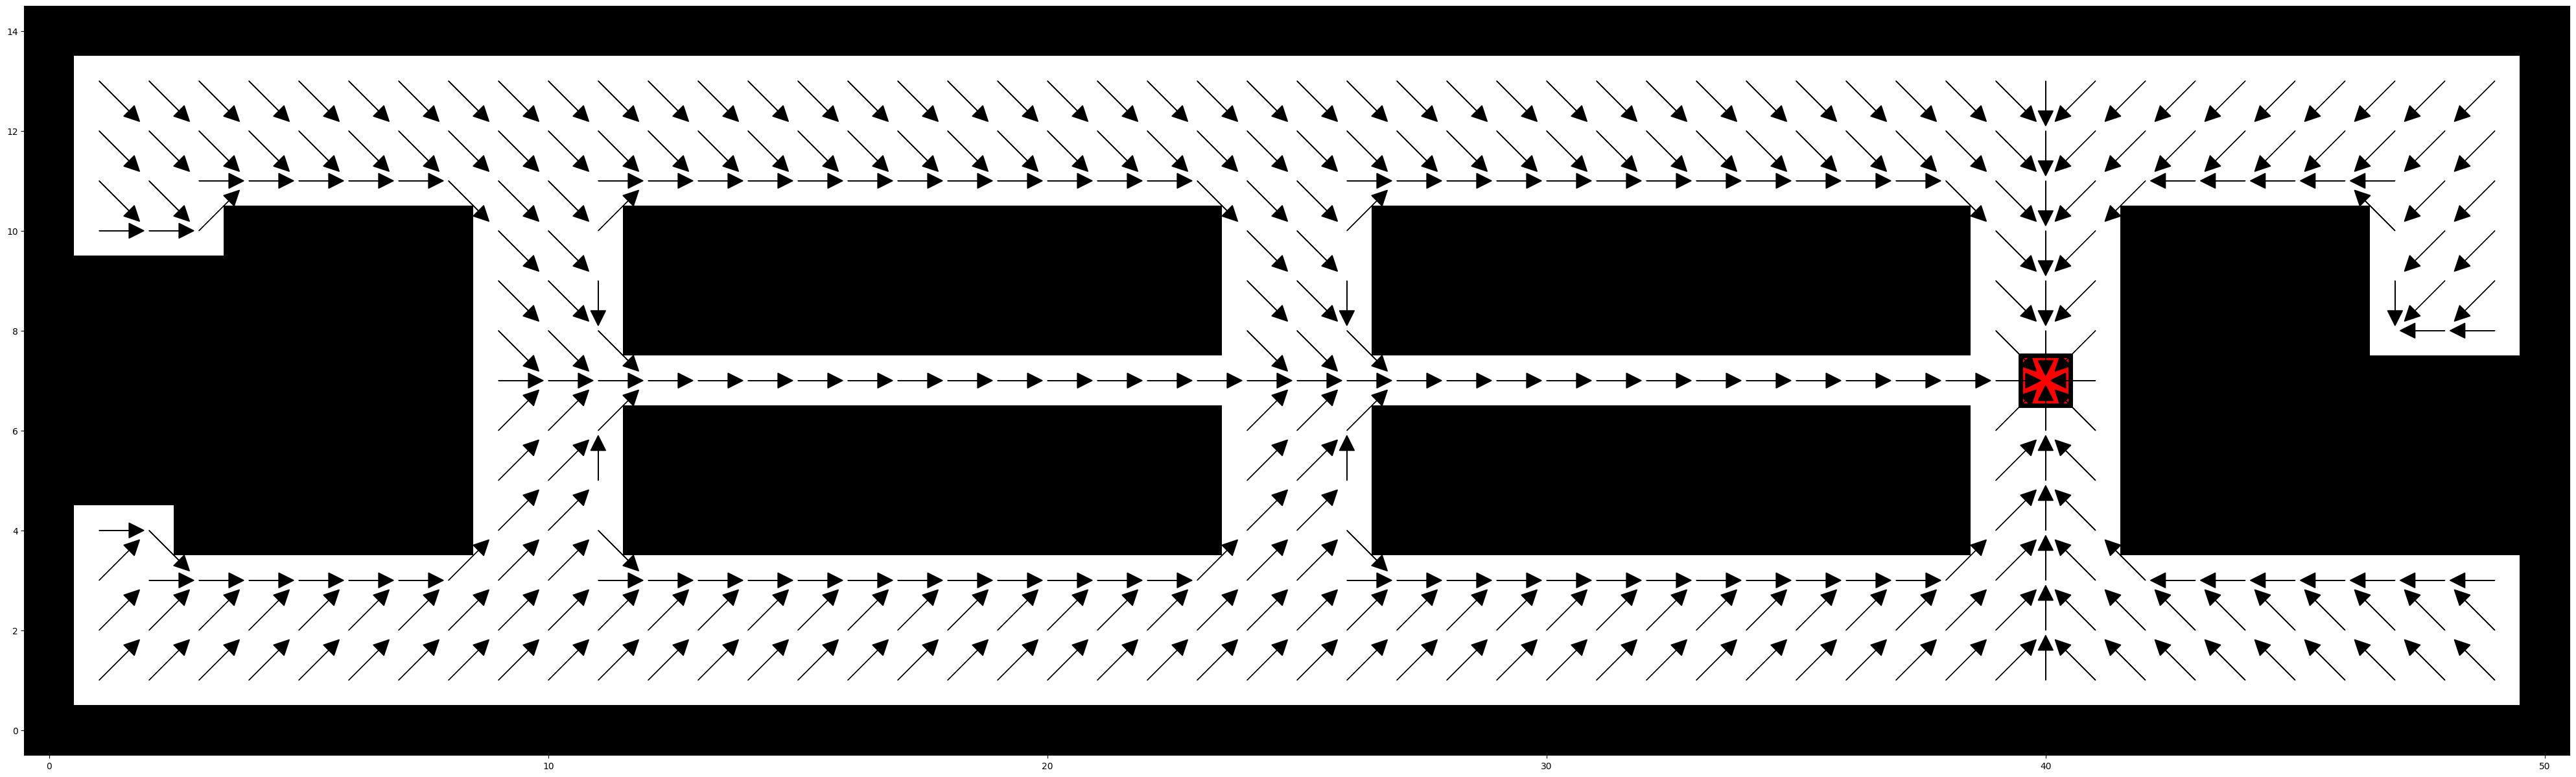

In [5]:
# Visualizamos la política que por defecto intenta resolver el problema con la política greedy

problem.visualiza_politica()


In [ ]:
# para comenzar a entrenar un modelo sacamos la matriz de transiciones y las recompensas

transiciones = problem.transiciones
recompensas = problem.recompensas

## a montecarlo podemos pasarle una política inicial, por defecto es aleatorio, si la política nos entra de la forma
# [esperar,esperar,norte,...] esto no es procesable por el algoritmo, debe ser un diccionario, para ello podemos usar este método

# por defecto hemos resuelto con greedy por tanto

politica_greedy = problem.politica

politica_procesable = utils.obtener_politica_final(politica_greedy)



In [ ]:
modelo_mc = mc.MonteCarlo(transiciones, recompensas, politica0= politica_procesable, max_iteraciones=10000)

modelo_mc.entrenar_primera_visita()

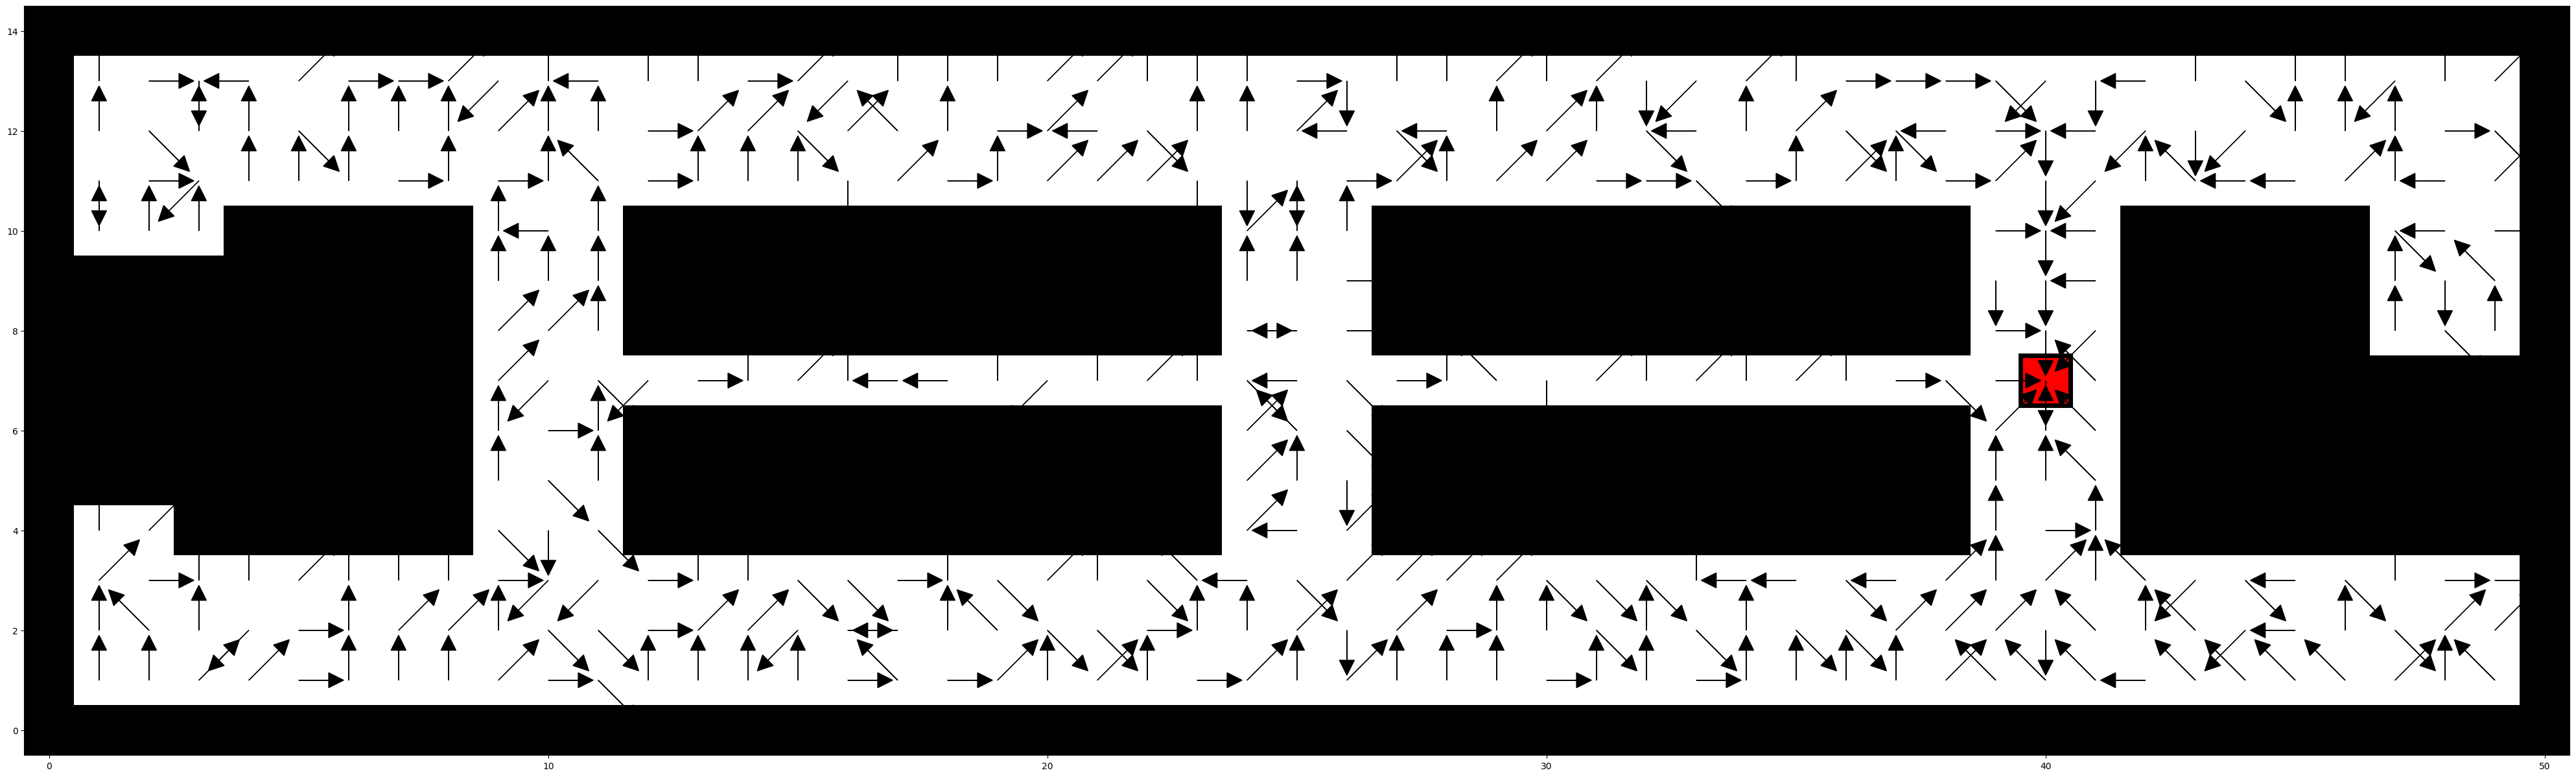

In [7]:
# obtenemos la política y la actualizamos en el problema

politica_mc = modelo_mc.obtener_politica()
problem.actualiza_politica(politica_mc)
problem.visualiza_politica()